In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

In [29]:
df = pd.read_csv('cost-of-living.csv')
df = df.rename(columns={"Unnamed: 0":"index"})
df = df.set_index("index").transpose().reset_index()
df = df.rename(columns={"index":"Country_Capital"})
df[["Capital","Country"]] = df['Country_Capital'].str.rsplit(',',expand=True,n=1)
df.info()
#df.to_csv('cost-of-living-clean.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 58 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Country_Capital                                                             160 non-null    object 
 1   Meal, Inexpensive Restaurant                                                160 non-null    float64
 2   Meal for 2 People, Mid-range Restaurant, Three-course                       160 non-null    float64
 3   McMeal at McDonalds (or Equivalent Combo Meal)                              160 non-null    float64
 4   Domestic Beer (0.5 liter draught)                                           160 non-null    float64
 5   Imported Beer (0.33 liter draught)                                          160 non-null    float64
 6   Coke/Pepsi (0.33 liter bottle)                    

In [30]:
country = df.groupby('Country').mean()
capital = df.groupby('Capital').mean()
country

index,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter draught),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
Country,,,,,,,,,,,,,,,,,,,,,
Albania,4.100000,24.620000,4.760000,1.270000,2.000000,1.070000,0.540,1.070000,0.610000,1.470000,...,0.780000,1.200000,1.090000,0.900000,1.320000,0.660000,6.890000,17174.100000,127.150,2323.770000
Argentina,5.990000,20.970000,4.940000,1.500000,1.950000,0.940000,0.730,0.810000,1.100000,1.350000,...,0.770000,1.460000,0.770000,1.020000,1.130000,0.740000,4.710000,16555.150000,162.720,3114.280000
Armenia,4.700000,22.540000,4.600000,1.130000,1.690000,0.600000,0.340,0.820000,0.430000,1.440000,...,0.370000,1.950000,1.080000,0.710000,1.200000,0.500000,5.960000,19843.590000,141.660,3020.370000
Australia,11.606000,50.078000,7.172000,5.272000,5.458000,1.976000,1.666,0.940000,1.732000,2.636000,...,1.534000,2.680000,1.646000,2.864000,2.128000,1.582000,10.140000,15101.144000,1060.114,10779.152000
Austria,10.000000,45.000000,7.250000,4.000000,4.000000,2.770000,2.050,1.030000,1.750000,2.550000,...,1.190000,3.190000,1.260000,2.330000,1.670000,1.340000,14.300000,22357.620000,211.880,16035.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,17.490000,64.150000,7.000000,5.830000,5.250000,1.660000,1.310,1.130000,1.270000,2.390000,...,0.880000,3.300000,1.520000,2.680000,1.340000,1.200000,9.790000,25282.880000,1605.650,21240.000000
United States,13.734615,56.656923,7.202308,5.216923,5.977692,1.806154,1.440,0.775385,2.621538,2.393846,...,1.389231,3.827692,3.800769,3.609231,1.481538,2.194615,11.843077,18976.594615,1165.580,19353.713846
Uruguay,8.410000,31.230000,6.960000,1.920000,2.400000,1.250000,1.010,0.670000,1.690000,2.040000,...,0.900000,2.350000,1.010000,1.720000,1.810000,1.160000,7.100000,28427.940000,275.580,5749.210000


# Food 

we will be looking at the following:

Meal, Inexpensive Restaurant

Meal for 2 People, Mid-range Restaurant, Three-course   

McMeal at McDonalds (or Equivalent Combo Meal)    

Coke/Pepsi (0.33 liter bottle)      

Water (0.33 liter bottle)              

Milk (regular), (1 liter)                

Loaf of Fresh White Bread (500g)             

Eggs (regular) (12)                            

Local Cheese (1kg)                             

Water (1.5 liter bottle)                          

Bottle of Wine (Mid-Range)                         

Chicken Breasts (Boneless, Skinless), (1kg)

Apples (1kg)                           

Oranges (1kg)                                         

Potato (1kg)                              
                                 
Lettuce (1 head)                              

Cappuccino (regular)                                 

Rice (white), (1kg)                                  
                      
Tomato (1kg)                             

Banana (1kg)                            

Onion (1kg)                                     
                            
Beef Round (1kg) (or Equivalent Back Leg Red Meat)                         

In [31]:
food_country = country[['Meal, Inexpensive Restaurant','Meal for 2 People, Mid-range Restaurant, Three-course','McMeal at McDonalds (or Equivalent Combo Meal)','Coke/Pepsi (0.33 liter bottle)','Water (0.33 liter bottle) ','Milk (regular), (1 liter)','Loaf of Fresh White Bread (500g)','Eggs (regular) (12)','Local Cheese (1kg)','Water (1.5 liter bottle)','Chicken Breasts (Boneless, Skinless), (1kg)','Apples (1kg)','Oranges (1kg)','Potato (1kg)','Lettuce (1 head)','Cappuccino (regular)','Rice (white), (1kg)','Tomato (1kg)','Banana (1kg)','Onion (1kg)','Beef Round (1kg) (or Equivalent Back Leg Red Meat)']]
top_10_food_country = food_country.sort_values(by=['Meal, Inexpensive Restaurant','Meal for 2 People, Mid-range Restaurant, Three-course','McMeal at McDonalds (or Equivalent Combo Meal)','Coke/Pepsi (0.33 liter bottle)','Water (0.33 liter bottle) ','Milk (regular), (1 liter)','Loaf of Fresh White Bread (500g)','Eggs (regular) (12)','Local Cheese (1kg)','Water (1.5 liter bottle)','Chicken Breasts (Boneless, Skinless), (1kg)','Apples (1kg)','Oranges (1kg)','Potato (1kg)','Lettuce (1 head)','Cappuccino (regular)','Rice (white), (1kg)','Tomato (1kg)','Banana (1kg)','Onion (1kg)','Beef Round (1kg) (or Equivalent Back Leg Red Meat)'],ascending=False).head(10)
top_10_food_country

index,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),...,Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat)
Country,,,,,,,,,,,,,,,,,,,,,
Switzerland,23.12,92.460,12.94,3.87,3.210,1.580,2.88,5.330,22.630,1.13,...,3.820,4.100,2.750,2.580,4.66,2.520,3.790,2.89,2.69,46.090
Norway,18.70,80.880,11.12,2.92,2.510,1.800,2.92,3.790,10.640,1.70,...,2.560,2.340,1.840,2.020,4.28,2.430,3.050,2.21,1.61,25.580
Iceland,17.96,109.160,11.64,2.61,1.920,1.200,2.91,4.800,12.290,1.57,...,2.090,1.960,1.860,2.200,4.11,2.370,3.370,1.66,1.42,20.840
United Kingdom,17.49,64.150,7.00,1.66,1.310,1.130,1.27,2.390,7.870,0.91,...,2.110,2.390,1.370,0.880,3.30,1.520,2.680,1.34,1.20,9.790
Denmark,17.40,80.290,10.04,3.02,2.220,1.210,2.75,3.070,10.500,1.07,...,2.440,2.610,1.630,1.450,5.21,1.980,3.000,2.25,1.33,11.380
Israel,15.55,63.495,12.96,2.22,1.765,1.485,1.89,3.255,11.735,1.39,...,2.715,1.520,1.055,1.485,3.10,2.155,1.445,2.02,0.98,16.720
Belgium,15.00,60.000,8.20,2.47,2.070,0.970,1.64,2.650,13.140,0.94,...,2.170,2.240,1.500,1.290,3.17,2.190,2.070,1.63,1.30,13.560
Ireland,15.00,60.000,8.00,1.80,1.590,0.950,1.42,2.790,7.510,1.41,...,2.090,2.300,1.560,0.960,3.20,1.590,2.770,1.90,1.14,9.240
Italy,15.00,57.500,8.00,2.18,1.055,1.245,1.74,2.915,12.935,0.39,...,2.005,1.945,1.305,1.135,1.37,2.135,2.245,1.88,1.28,16.145


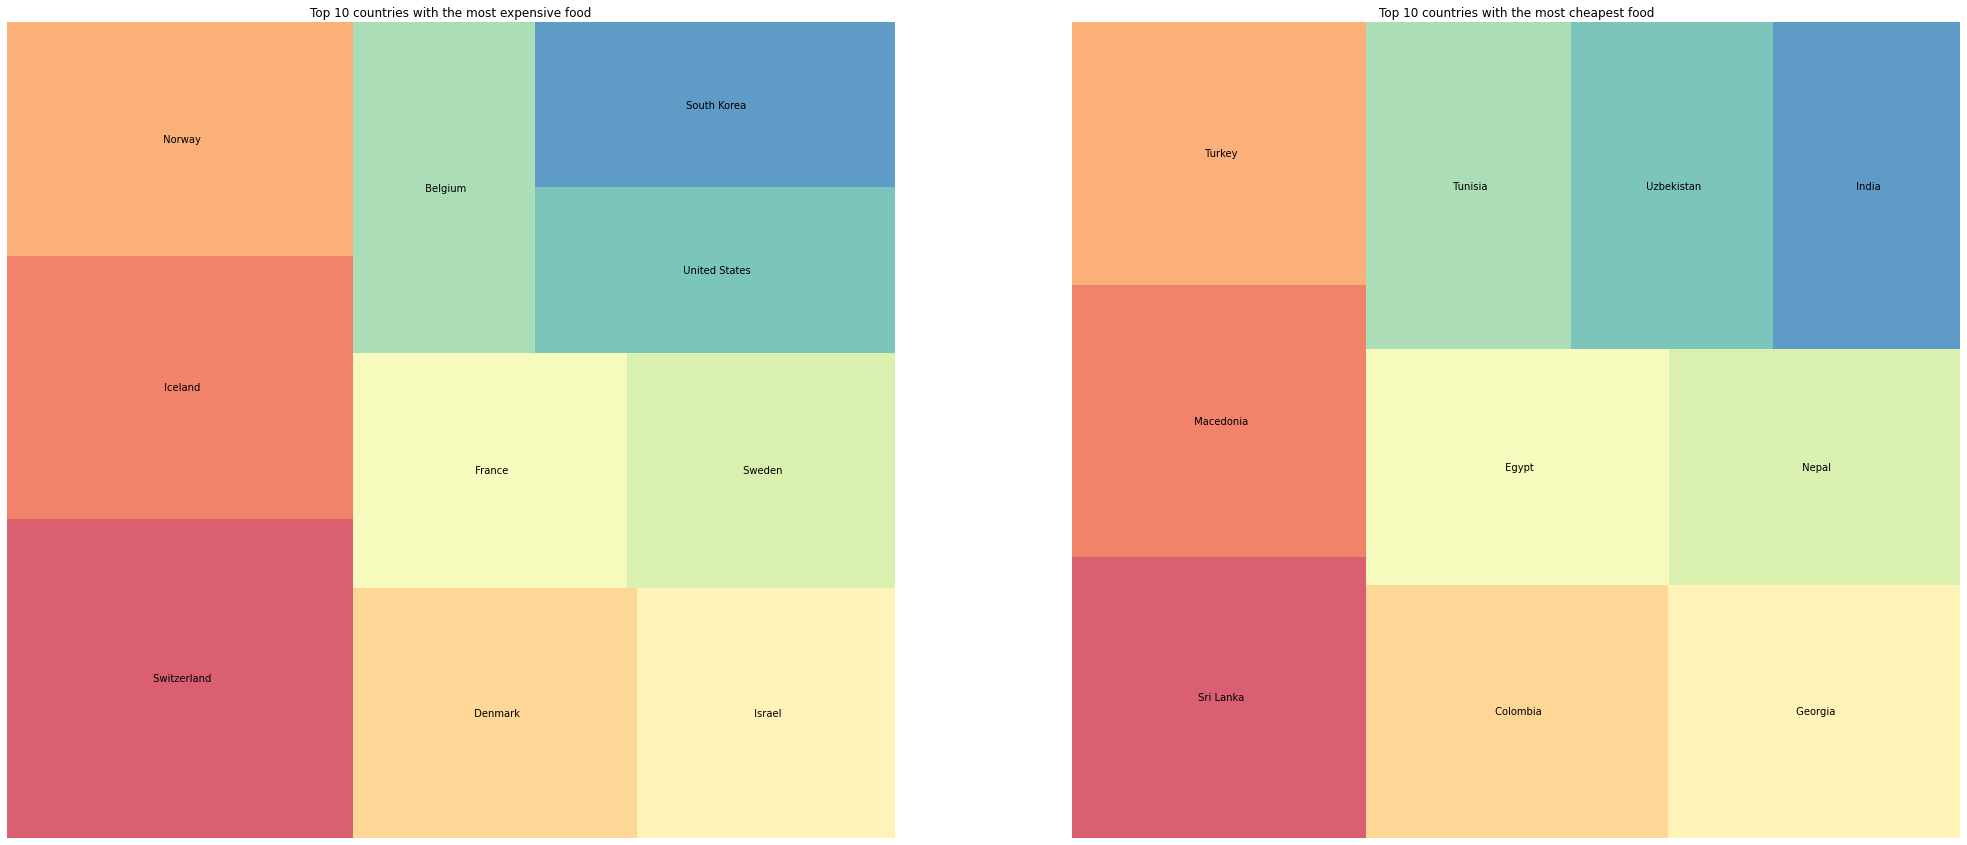

In [32]:


grouped = food_country.groupby('Country').sum()
grouped_sorted = grouped.sum(axis=1).sort_values(ascending=False)
grouped_top10 = grouped_sorted.head(10)
grouped_low10 = grouped_sorted.tail(10)

fig, axs = plt.subplots(1,2,figsize=(35,15))
axs[0].set_title("Top 10 countries with the most expensive food")
squarify.plot(sizes=grouped_top10.values, label=grouped_top10.index,color = sns.color_palette("Spectral",len((grouped_top10))) ,alpha=.8,ax=axs[0] )
axs[1].set_title("Top 10 countries with the most cheapest food")
squarify.plot(sizes=grouped_low10.values, label=grouped_low10.index,color = sns.color_palette("Spectral",len((grouped_low10))) ,alpha=.8,ax=axs[1] )

axs[0].axis('off')
axs[1].axis('off')
plt.show()


<AxesSubplot: title={'center': 'Cheapest'}, xlabel='Country'>

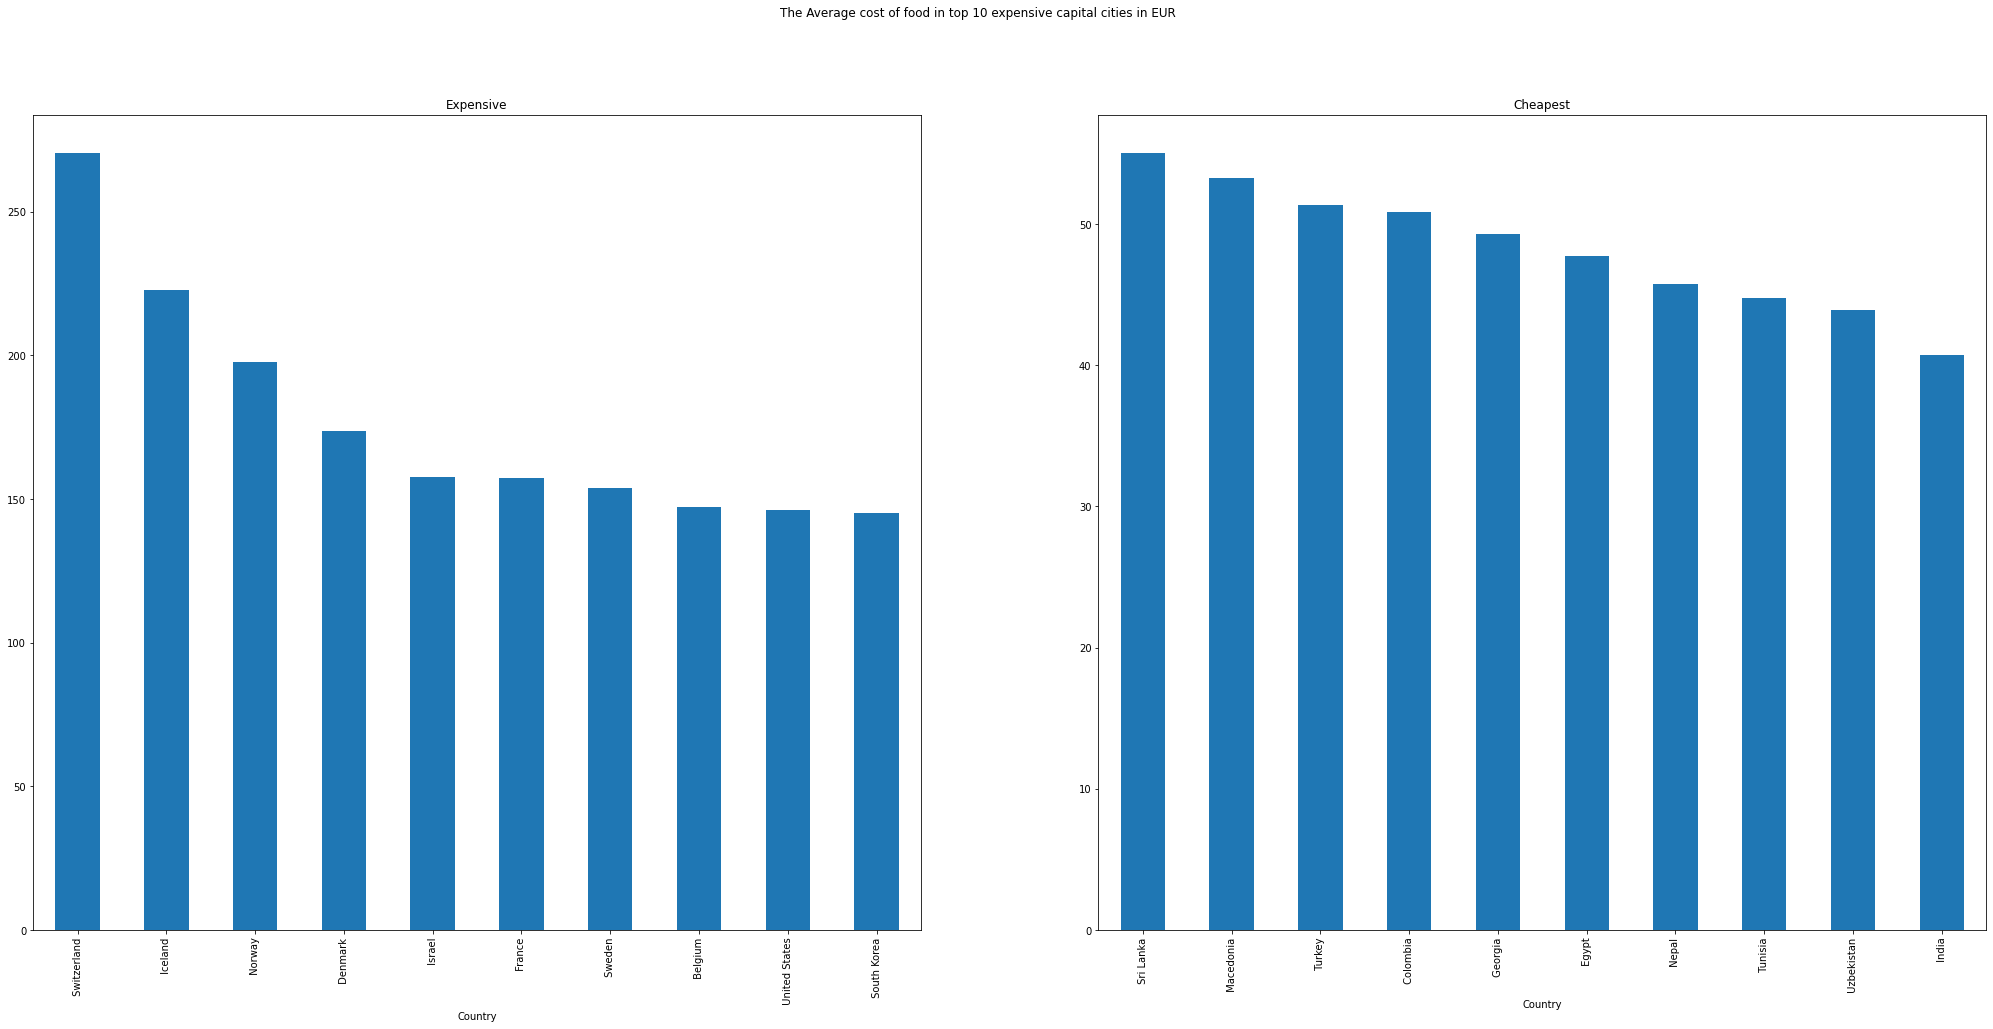

In [33]:
fig, axs = plt.subplots(1,2,figsize=(35,15))
fig.suptitle("The Average cost of food in top 10 expensive capital cities in EUR")
grouped_top10.plot(kind='bar',ax=axs[0],title="Expensive")
grouped_low10.plot(kind='bar',ax=axs[1],title="Cheapest")


In [34]:
food_capital = capital[['Meal, Inexpensive Restaurant','Meal for 2 People, Mid-range Restaurant, Three-course','McMeal at McDonalds (or Equivalent Combo Meal)','Coke/Pepsi (0.33 liter bottle)','Water (0.33 liter bottle) ','Milk (regular), (1 liter)','Loaf of Fresh White Bread (500g)','Eggs (regular) (12)','Local Cheese (1kg)','Water (1.5 liter bottle)','Chicken Breasts (Boneless, Skinless), (1kg)','Apples (1kg)','Oranges (1kg)','Potato (1kg)','Lettuce (1 head)','Cappuccino (regular)','Rice (white), (1kg)','Tomato (1kg)','Banana (1kg)','Onion (1kg)','Beef Round (1kg) (or Equivalent Back Leg Red Meat)']]
top_10_food_capital = food_capital.sort_values(by=['Meal, Inexpensive Restaurant','Meal for 2 People, Mid-range Restaurant, Three-course','McMeal at McDonalds (or Equivalent Combo Meal)','Coke/Pepsi (0.33 liter bottle)','Water (0.33 liter bottle) ','Milk (regular), (1 liter)','Loaf of Fresh White Bread (500g)','Eggs (regular) (12)','Local Cheese (1kg)','Water (1.5 liter bottle)','Chicken Breasts (Boneless, Skinless), (1kg)','Apples (1kg)','Oranges (1kg)','Potato (1kg)','Lettuce (1 head)','Cappuccino (regular)','Rice (white), (1kg)','Tomato (1kg)','Banana (1kg)','Onion (1kg)','Beef Round (1kg) (or Equivalent Back Leg Red Meat)'],ascending=False).head(10)
top_10_food_capital.to_csv('food.csv')

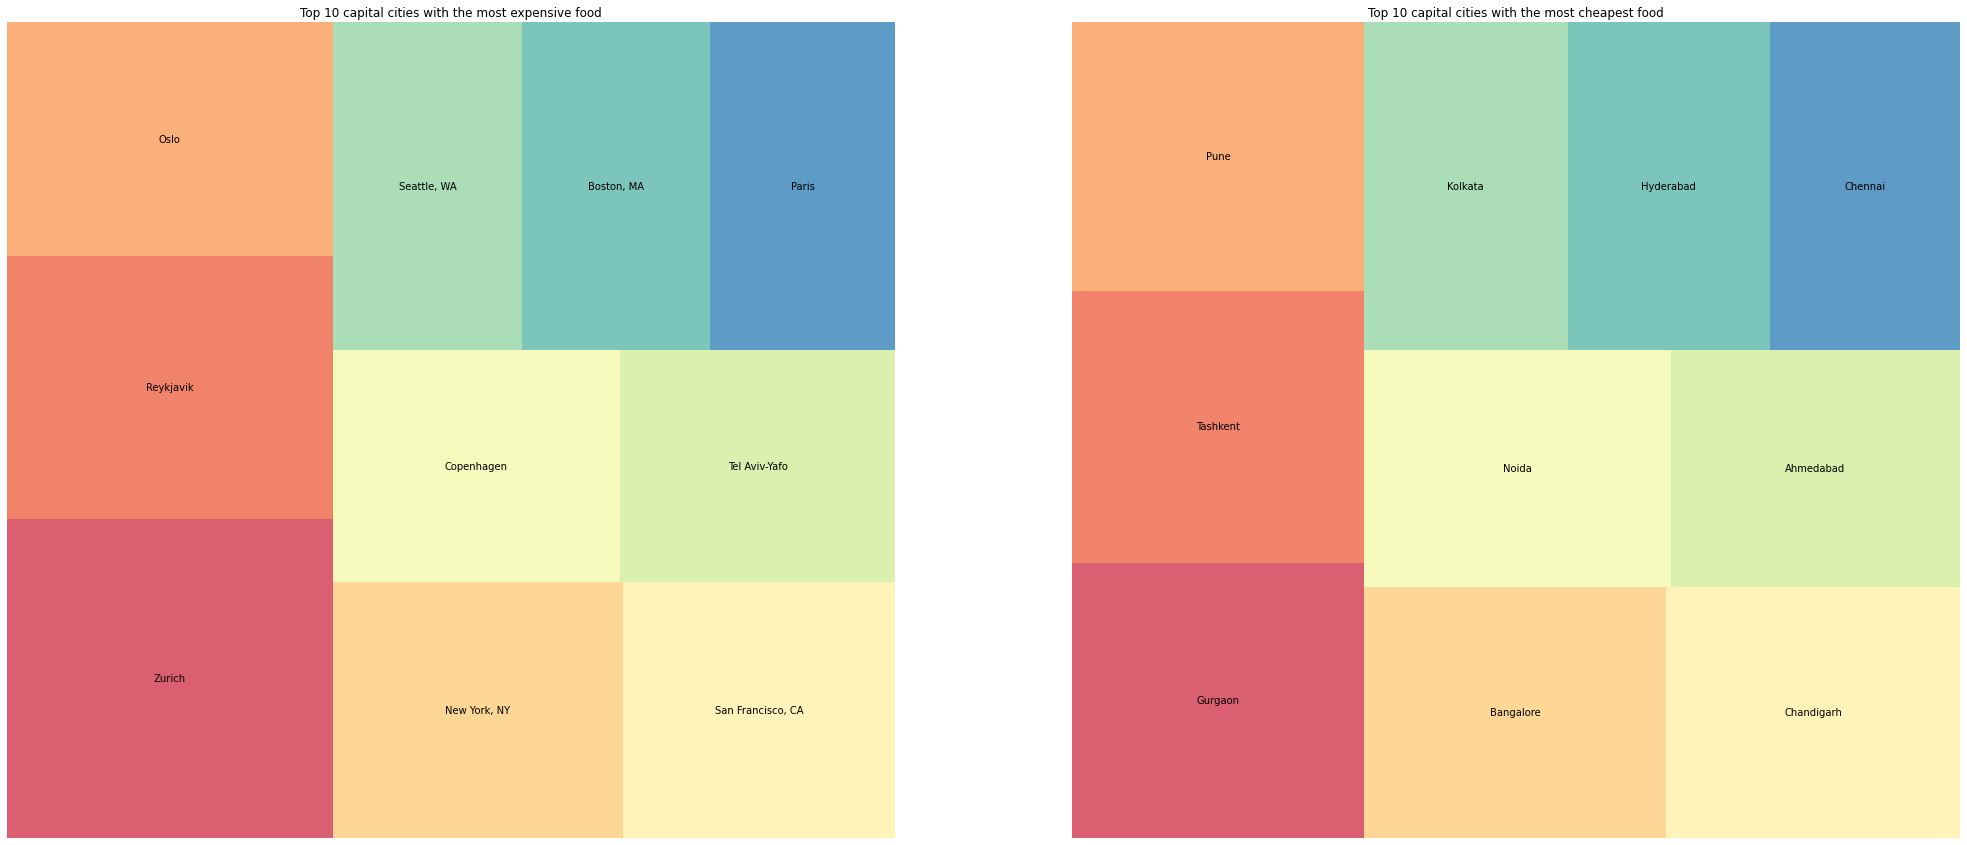

In [35]:

grouped = food_capital.groupby('Capital').sum()
grouped_sorted = grouped.sum(axis=1).sort_values(ascending=False)
grouped_top10 = grouped_sorted.head(10)
grouped_low10 = grouped_sorted.tail(10)

fig, axs = plt.subplots(1,2,figsize=(35,15))
axs[0].set_title("Top 10 capital cities with the most expensive food")
squarify.plot(sizes=grouped_top10.values, label=grouped_top10.index,color = sns.color_palette("Spectral",len((grouped_top10))) ,alpha=.8,ax=axs[0] )
axs[1].set_title("Top 10 capital cities with the most cheapest food")
squarify.plot(sizes=grouped_low10.values, label=grouped_low10.index,color = sns.color_palette("Spectral",len((grouped_low10))) ,alpha=.8,ax=axs[1] )

axs[0].axis('off')
axs[1].axis('off')
plt.show()

<AxesSubplot: title={'center': 'Cheapest'}, xlabel='Capital'>

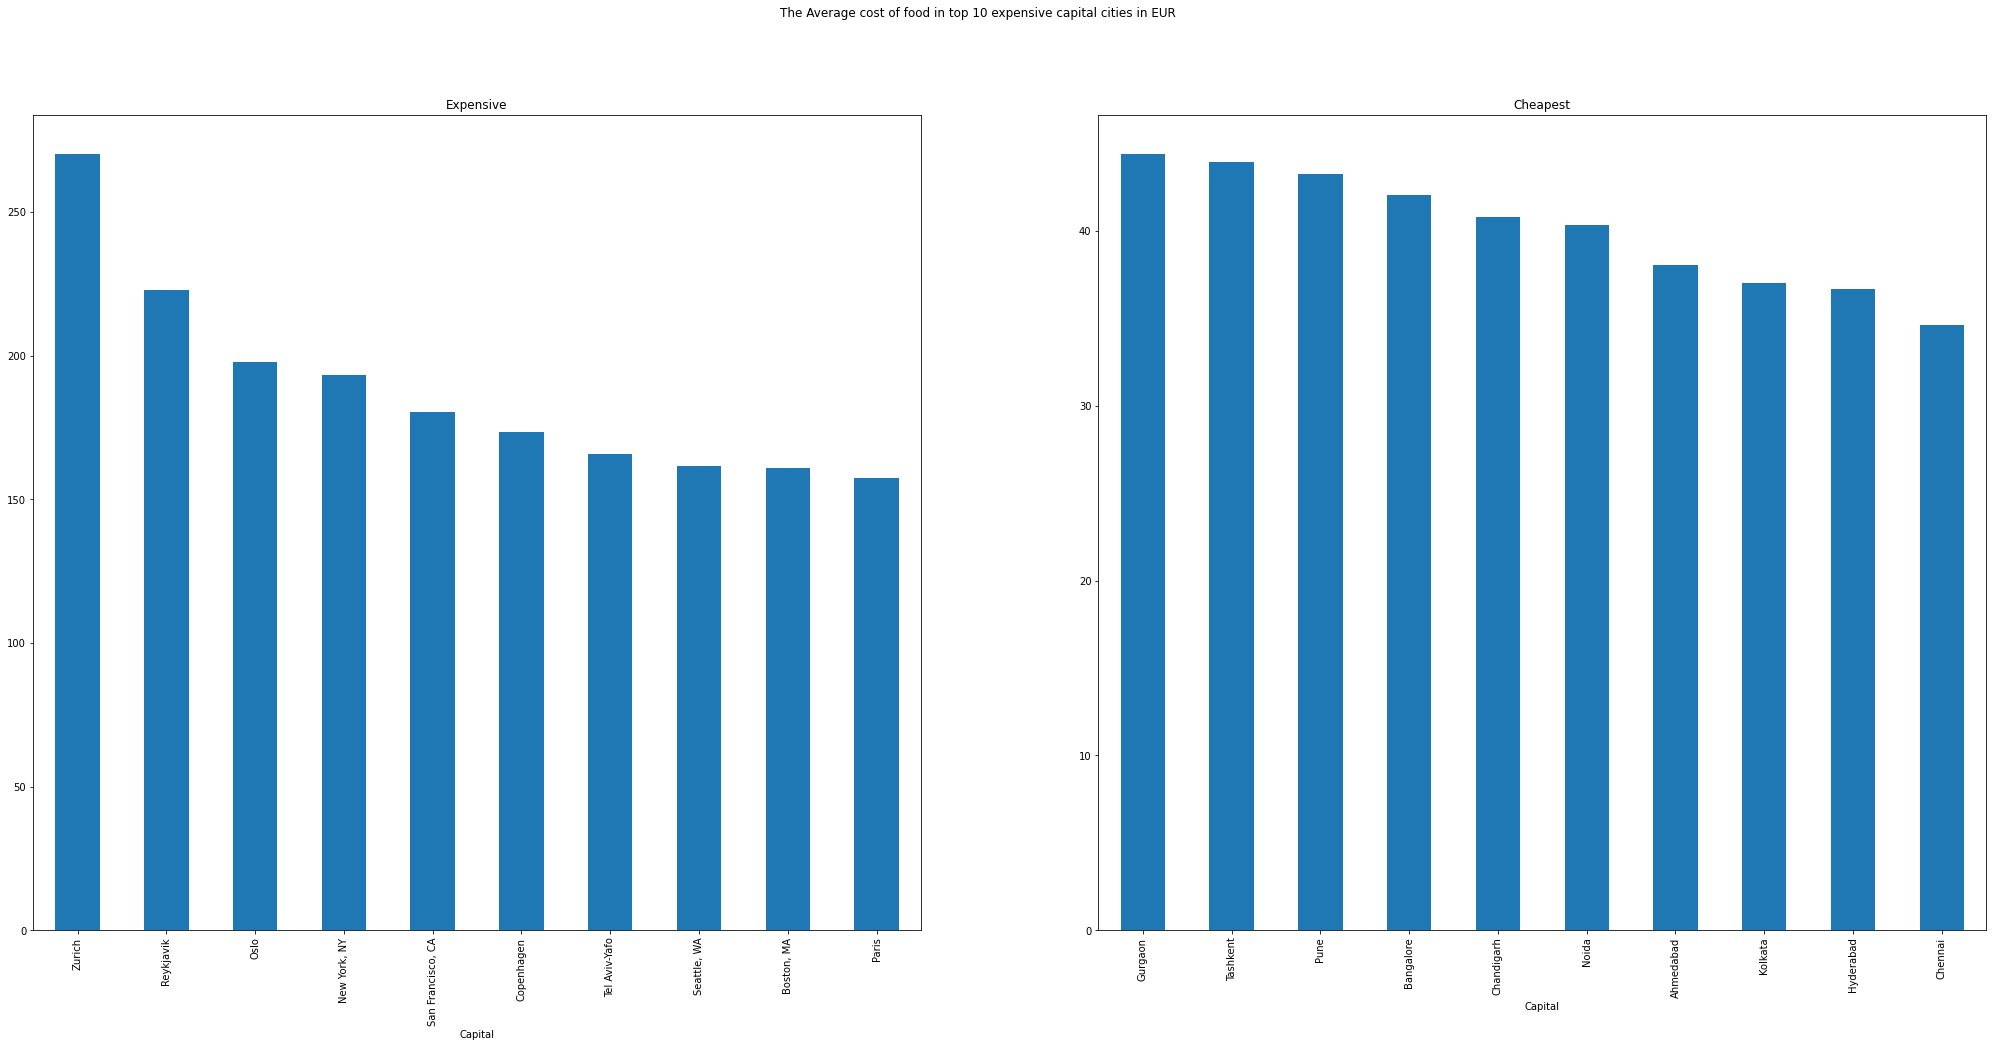

In [36]:
fig, axs = plt.subplots(1,2,figsize=(35,15))
fig.suptitle("The Average cost of food in top 10 expensive capital cities in EUR")
grouped_top10.plot(kind='bar',ax=axs[0],title="Expensive")
grouped_low10.plot(kind='bar',ax=axs[1],title="Cheapest")


# Transport 

 One-way Ticket (Local Transport)    
  
 Monthly Pass (Regular Price)         

 Gasoline (1 liter)   

 Volkswagen Golf  

 Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car)  

 Taxi Start (Normal Tariff)       

 Taxi 1km (Normal Tariff)   
                                               
 Taxi 1hour Waiting (Normal Tariff) 

In [37]:

transport_country = country[['One-way Ticket (Local Transport)','Monthly Pass (Regular Price)','Gasoline (1 liter)','Taxi Start (Normal Tariff)','Taxi 1km (Normal Tariff)','Taxi 1hour Waiting (Normal Tariff)']]
top_10_trans_country = transport_country.sort_values(by=['One-way Ticket (Local Transport)','Monthly Pass (Regular Price)','Gasoline (1 liter)','Taxi Start (Normal Tariff)','Taxi 1km (Normal Tariff)','Taxi 1hour Waiting (Normal Tariff)'],ascending=False).head(10)
top_10_trans_country.to_csv('transport.csv')

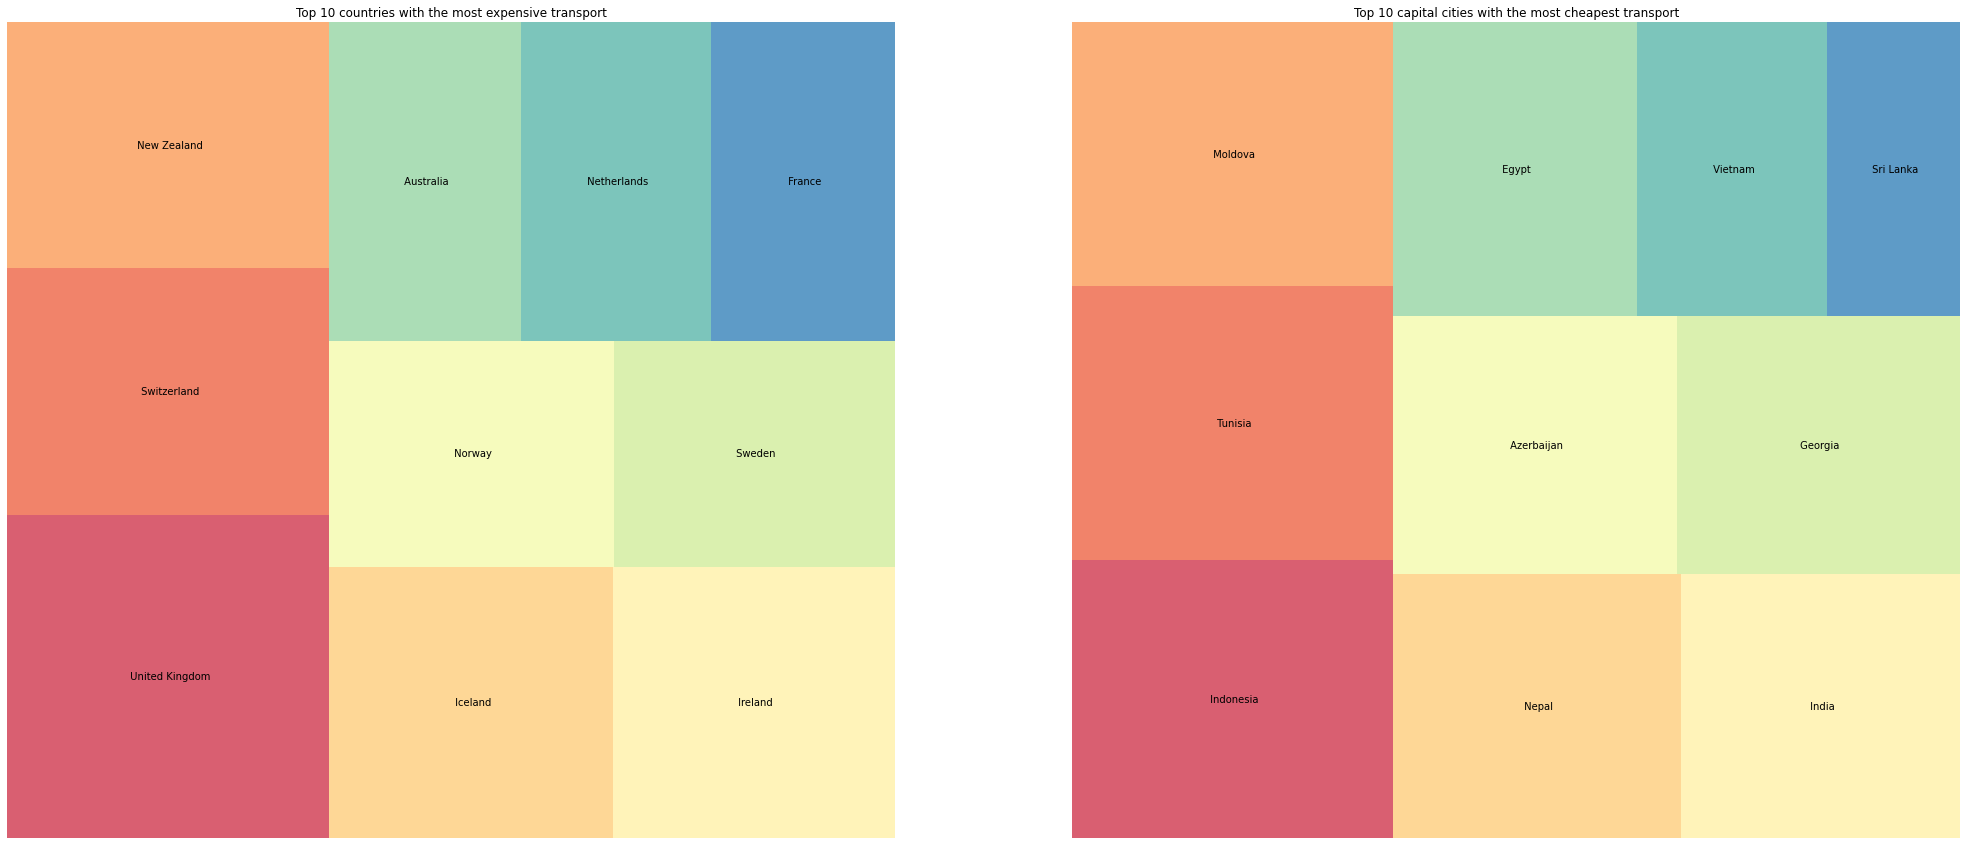

In [38]:
grouped = transport_country.groupby('Country').sum()
grouped_sorted = grouped.sum(axis=1).sort_values(ascending=False)
grouped_top10 = grouped_sorted.head(10)
grouped_low10 = grouped_sorted.tail(10)

fig, axs = plt.subplots(1,2,figsize=(35,15))
axs[0].set_title("Top 10 countries with the most expensive transport")
squarify.plot(sizes=grouped_top10.values, label=grouped_top10.index,color = sns.color_palette("Spectral",len((grouped_top10))) ,alpha=.8,ax=axs[0] )
axs[1].set_title("Top 10 capital cities with the most cheapest transport")
squarify.plot(sizes=grouped_low10.values, label=grouped_low10.index,color = sns.color_palette("Spectral",len((grouped_low10))) ,alpha=.8,ax=axs[1] )

axs[0].axis('off')
axs[1].axis('off')
plt.show()

<AxesSubplot: title={'center': 'Cheapest'}, xlabel='Country'>

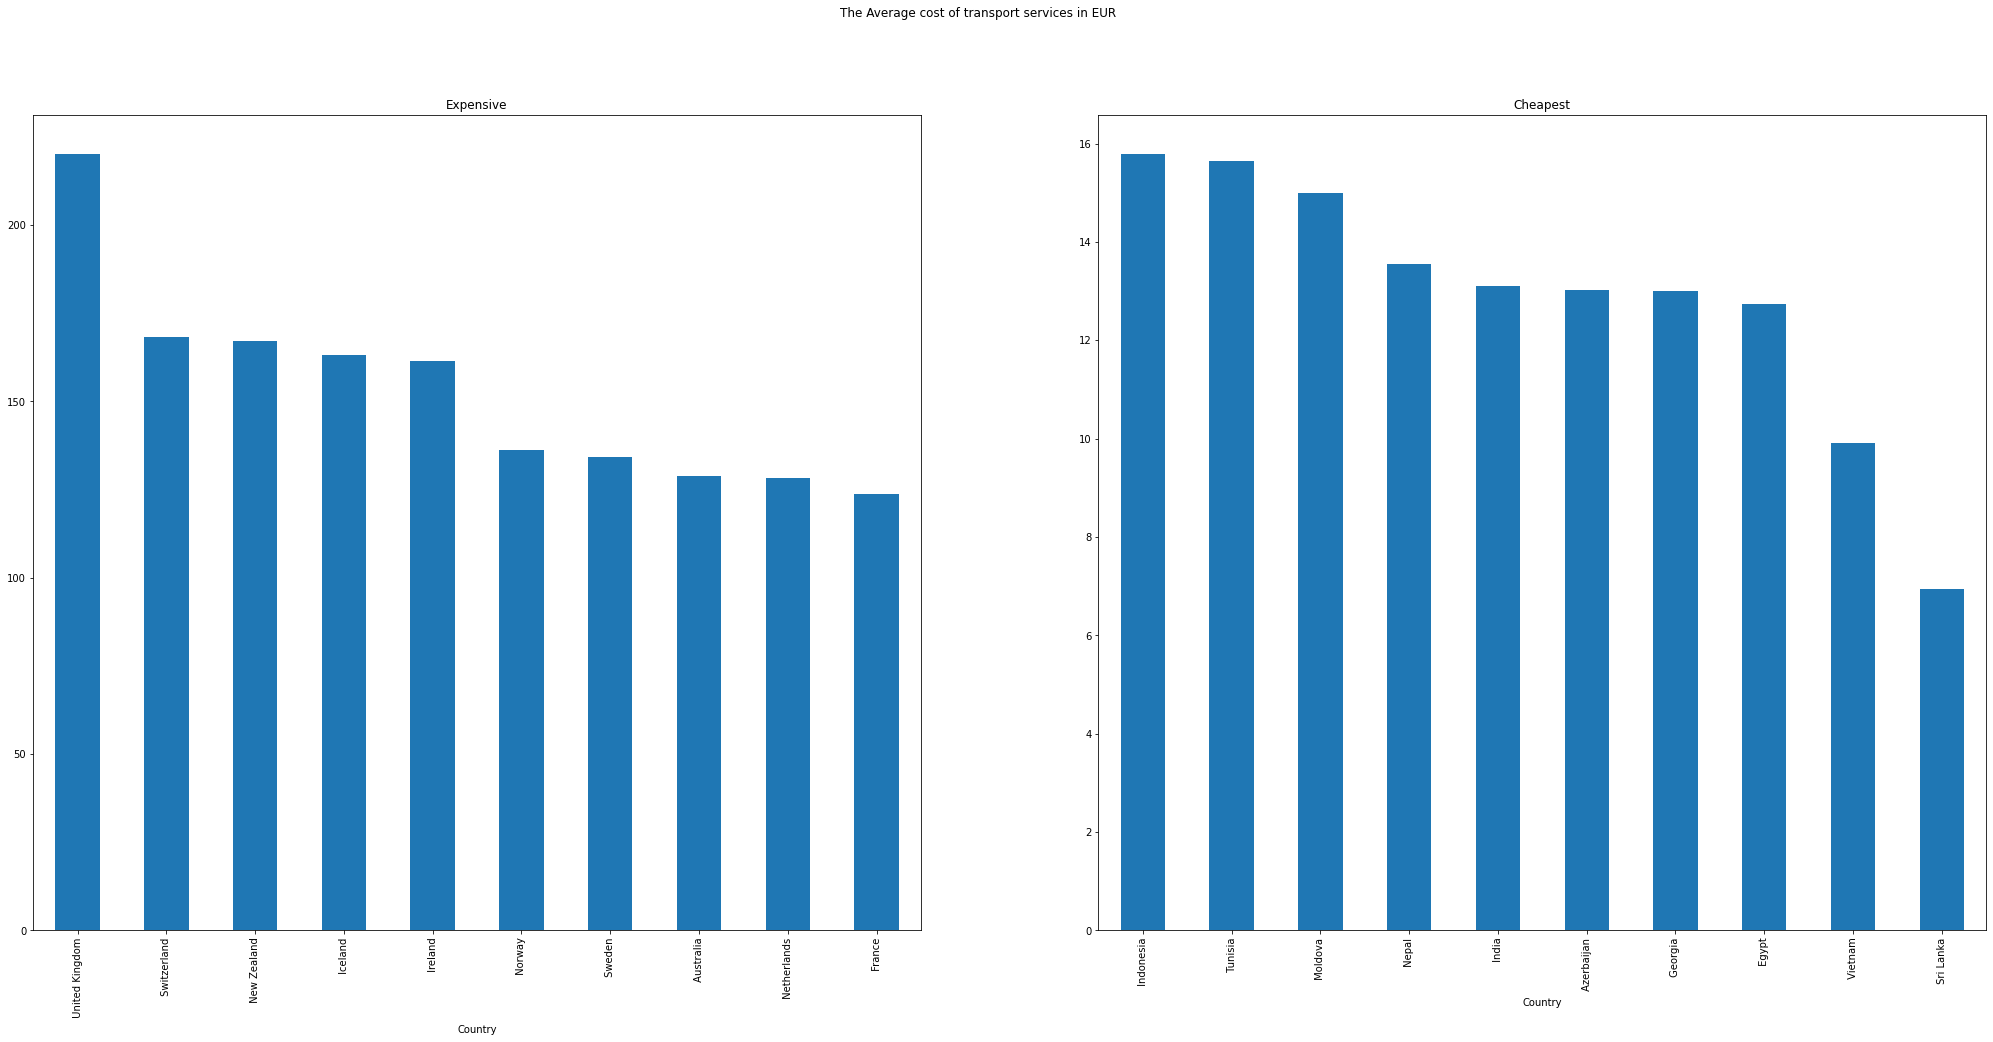

In [39]:
fig, axs = plt.subplots(1,2,figsize=(35,15))
fig.suptitle("The Average cost of transport services in EUR")
grouped_top10.plot(kind='bar',ax=axs[0],title="Expensive")
grouped_low10.plot(kind='bar',ax=axs[1],title="Cheapest")

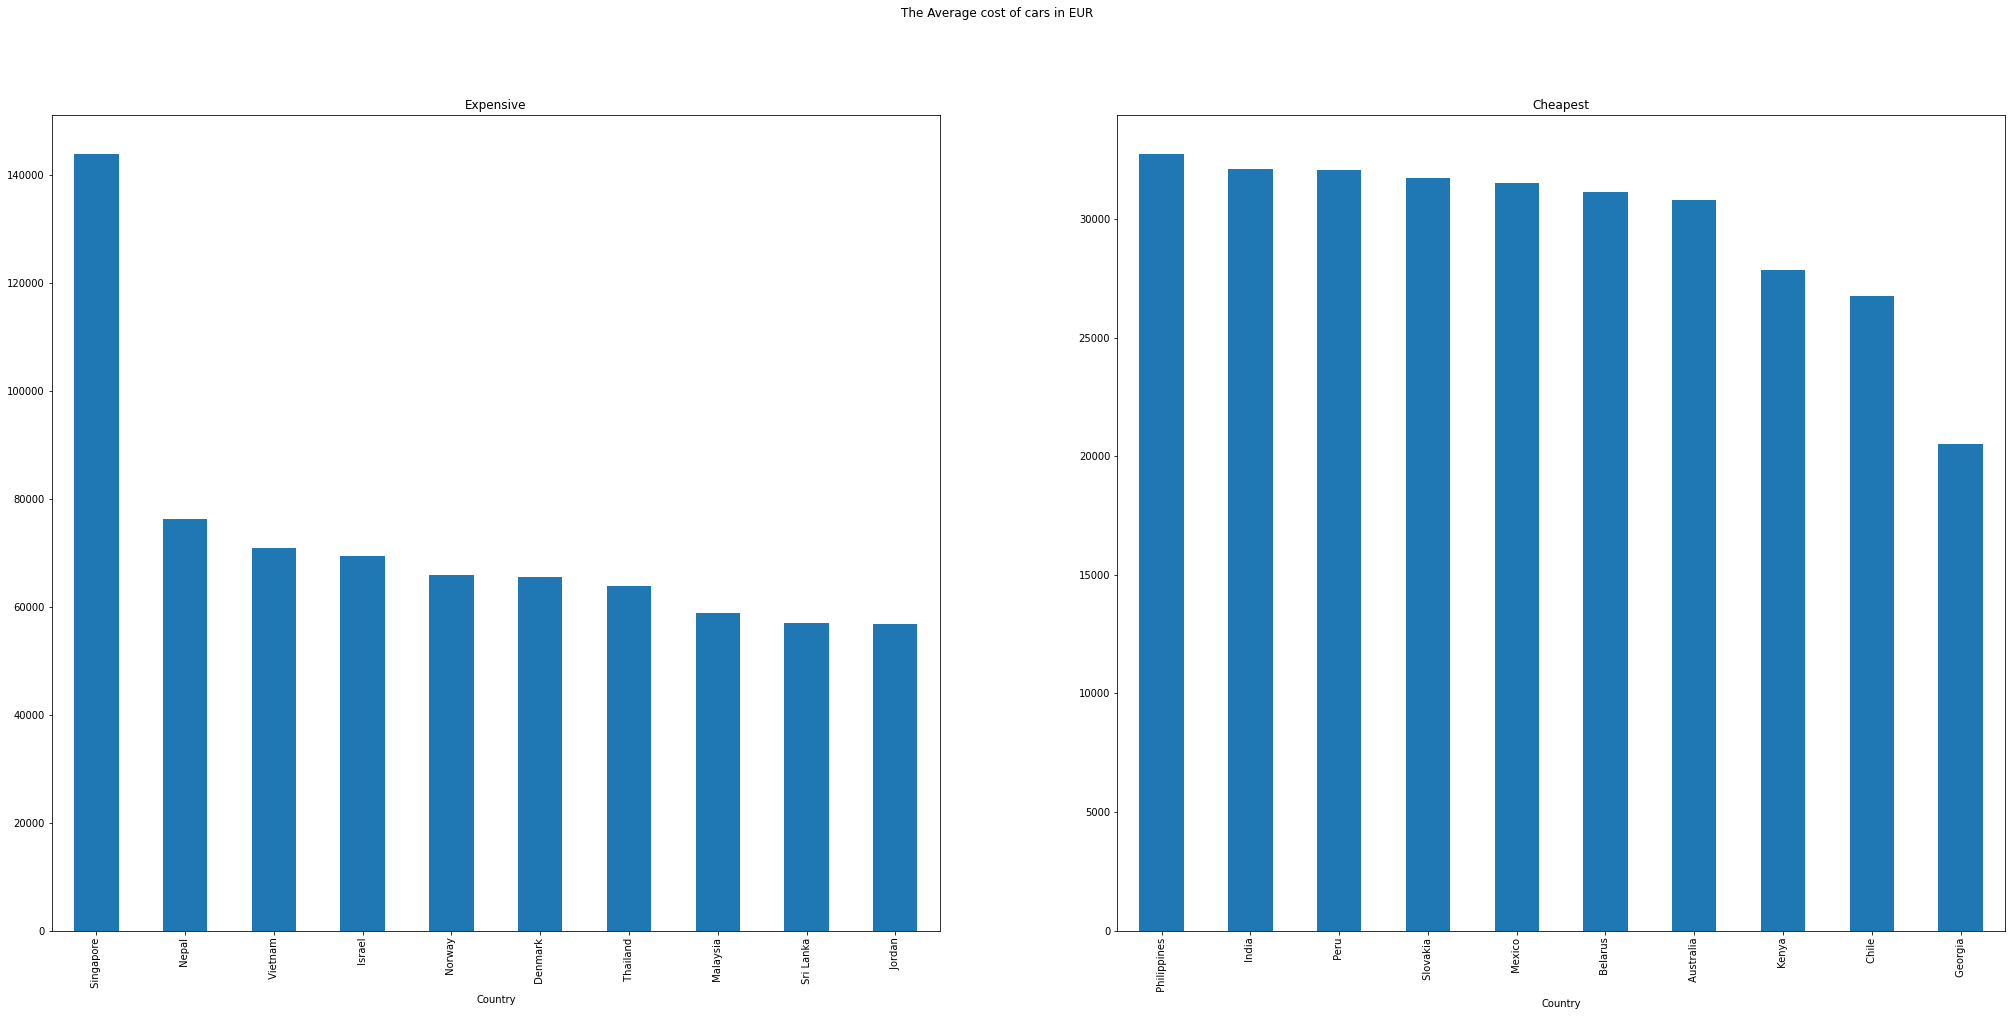

In [40]:
car = country[['Volkswagen Golf','Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car)']]
grouped = car.groupby('Country').sum()
grouped_sorted = grouped.sum(axis=1).sort_values(ascending=False)
top10 = grouped_sorted.head(10)
low10 = grouped_sorted.tail(10)

fig, axs = plt.subplots(1,2,figsize=(35,15))
fig.suptitle("The Average cost of cars in EUR")
top10.plot(kind='bar',ax=axs[0],title="Expensive")
low10.plot(kind='bar',ax=axs[1],title="Cheapest")
car.to_csv('car.csv')

# Housing and Education

Apartment (1 bedroom) in City Centre                                        

Apartment (1 bedroom) Outside of Centre                                    

Apartment (3 bedrooms) in City Centre                                       

Apartment (3 bedrooms) Outside of Centre                                    

Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment

Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate

Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child

International Primary School, Yearly for 1 Child   

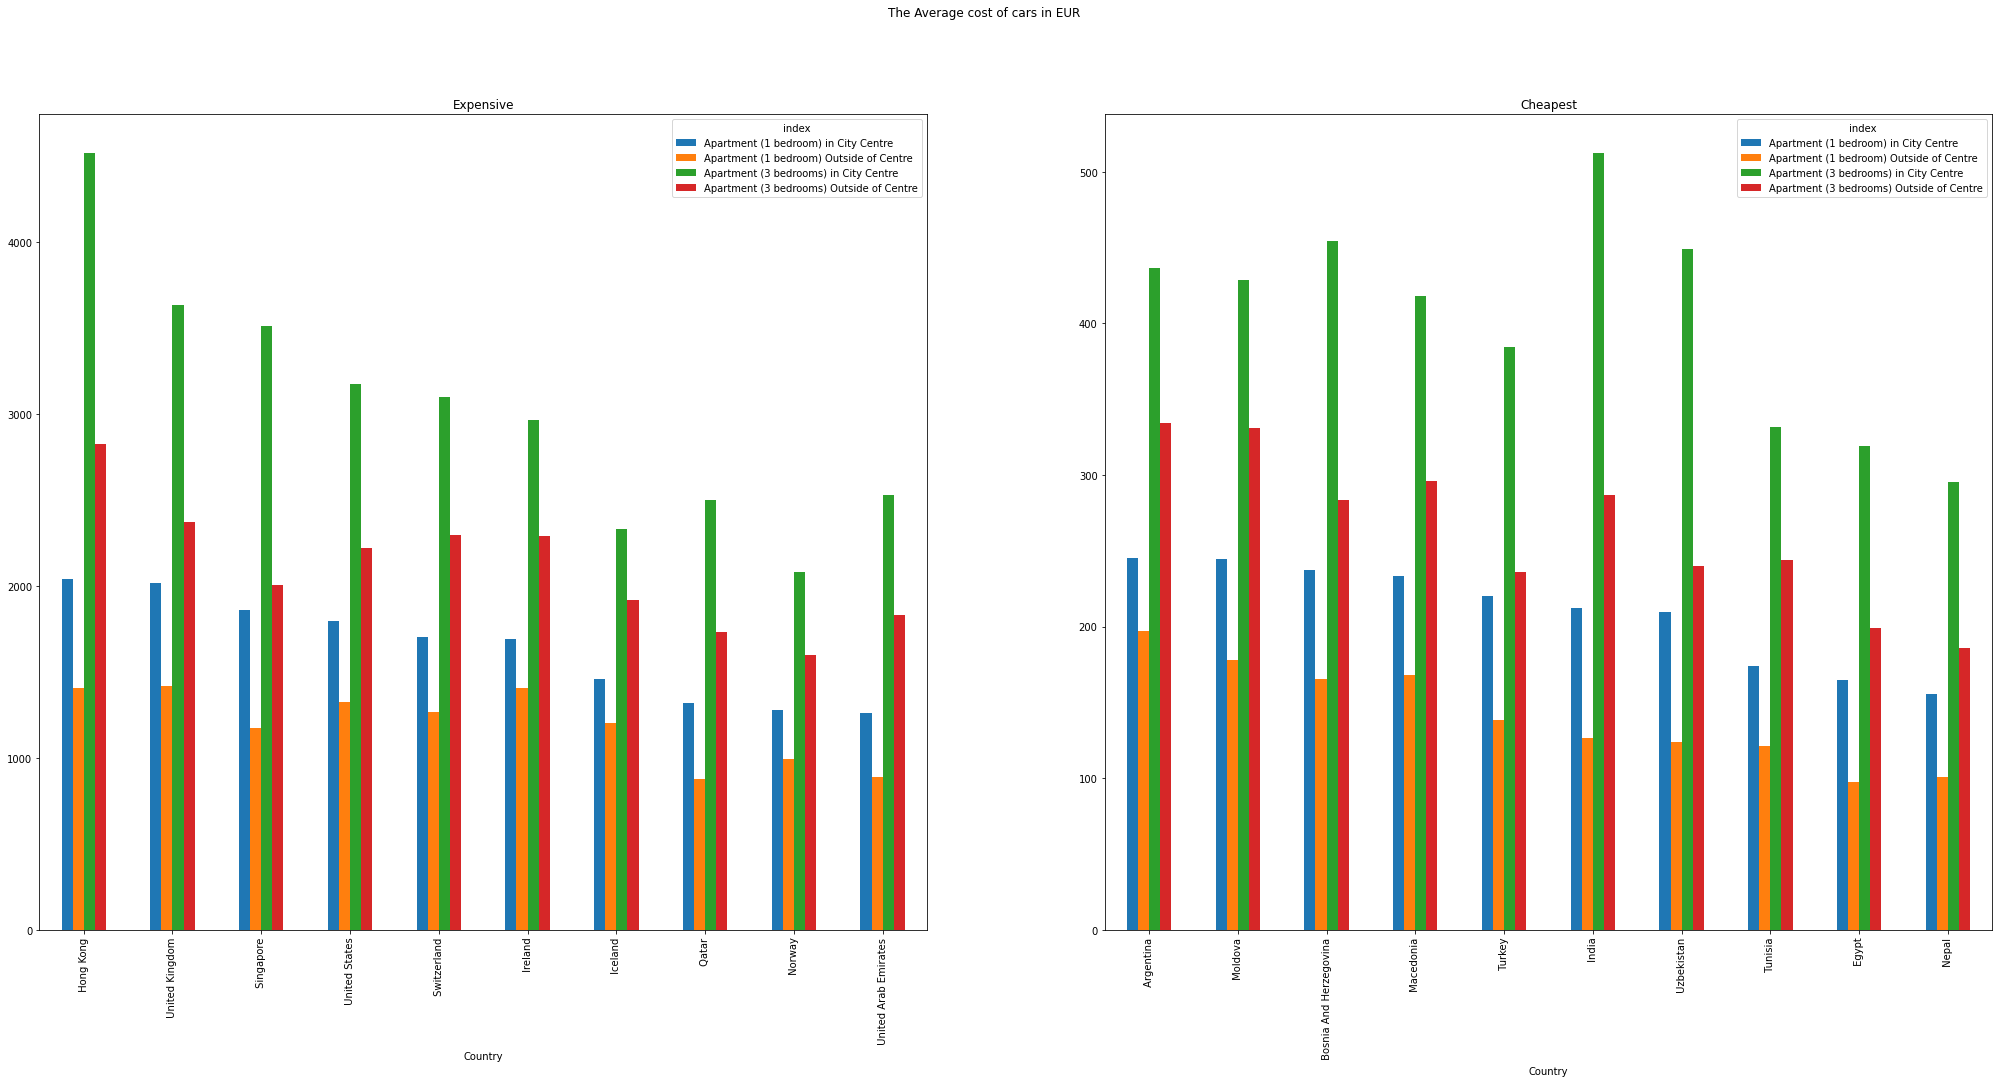

In [41]:
apartment = country[['Apartment (1 bedroom) in City Centre','Apartment (1 bedroom) Outside of Centre','Apartment (3 bedrooms) in City Centre','Apartment (3 bedrooms) Outside of Centre']]                                    

grouped_sorted = apartment.sort_values(by=['Apartment (1 bedroom) in City Centre','Apartment (1 bedroom) Outside of Centre','Apartment (3 bedrooms) in City Centre','Apartment (3 bedrooms) Outside of Centre'],ascending=False)
top10 = grouped_sorted.head(10)
low10 = grouped_sorted.tail(10)

fig, axs = plt.subplots(1,2,figsize=(35,15))
fig.suptitle("The Average cost of cars in EUR")
top10.plot(kind='bar',ax=axs[0],title="Expensive")
low10.plot(kind='bar',ax=axs[1],title="Cheapest")
apartment.to_csv('apartment.csv')

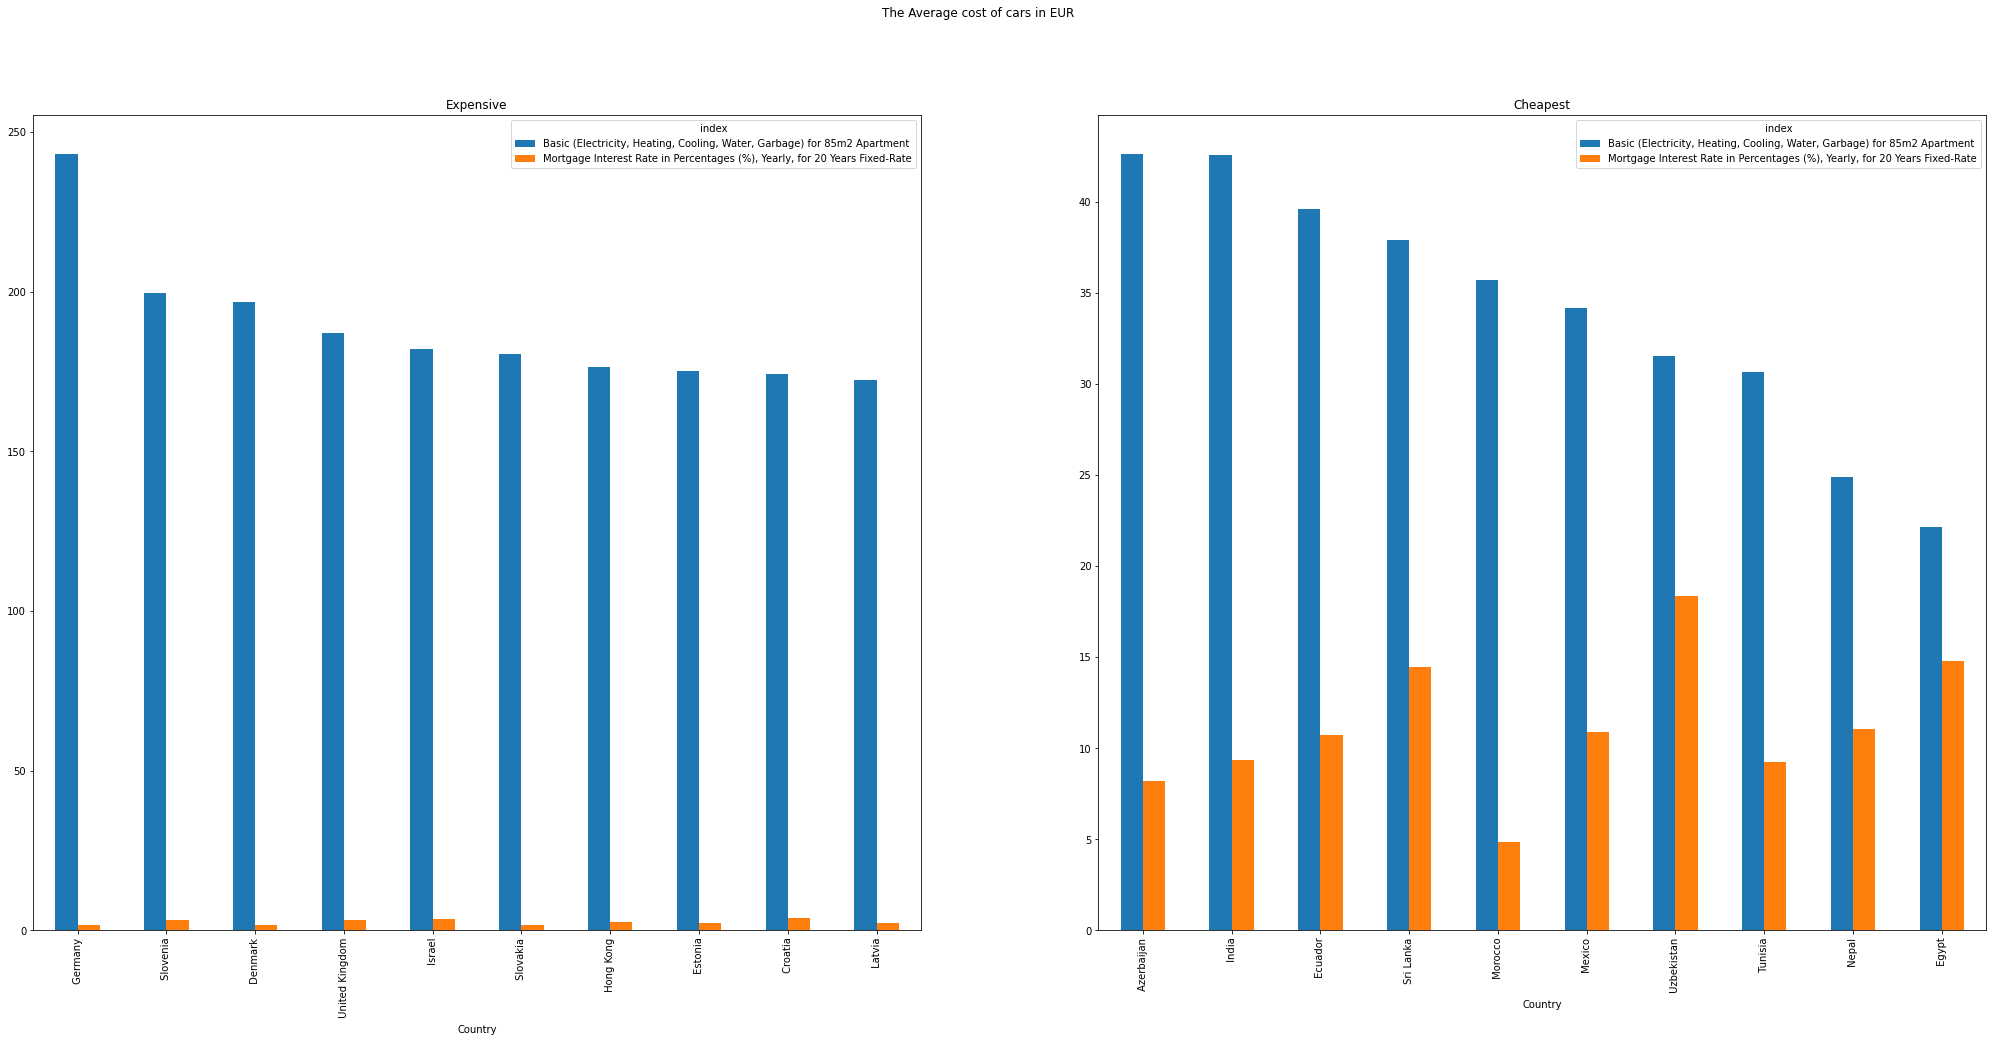

In [42]:
expenses = country[['Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment','Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate']]
grouped_sorted = expenses.sort_values(by=['Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment','Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate'],ascending=False)
top10 = grouped_sorted.head(10)
low10 = grouped_sorted.tail(10)

fig, axs = plt.subplots(1,2,figsize=(35,15))
fig.suptitle("The Average cost of cars in EUR")
top10.plot(kind='bar',ax=axs[0],title="Expensive")
low10.plot(kind='bar',ax=axs[1],title="Cheapest")
expenses.to_csv('expense.csv',index=False)

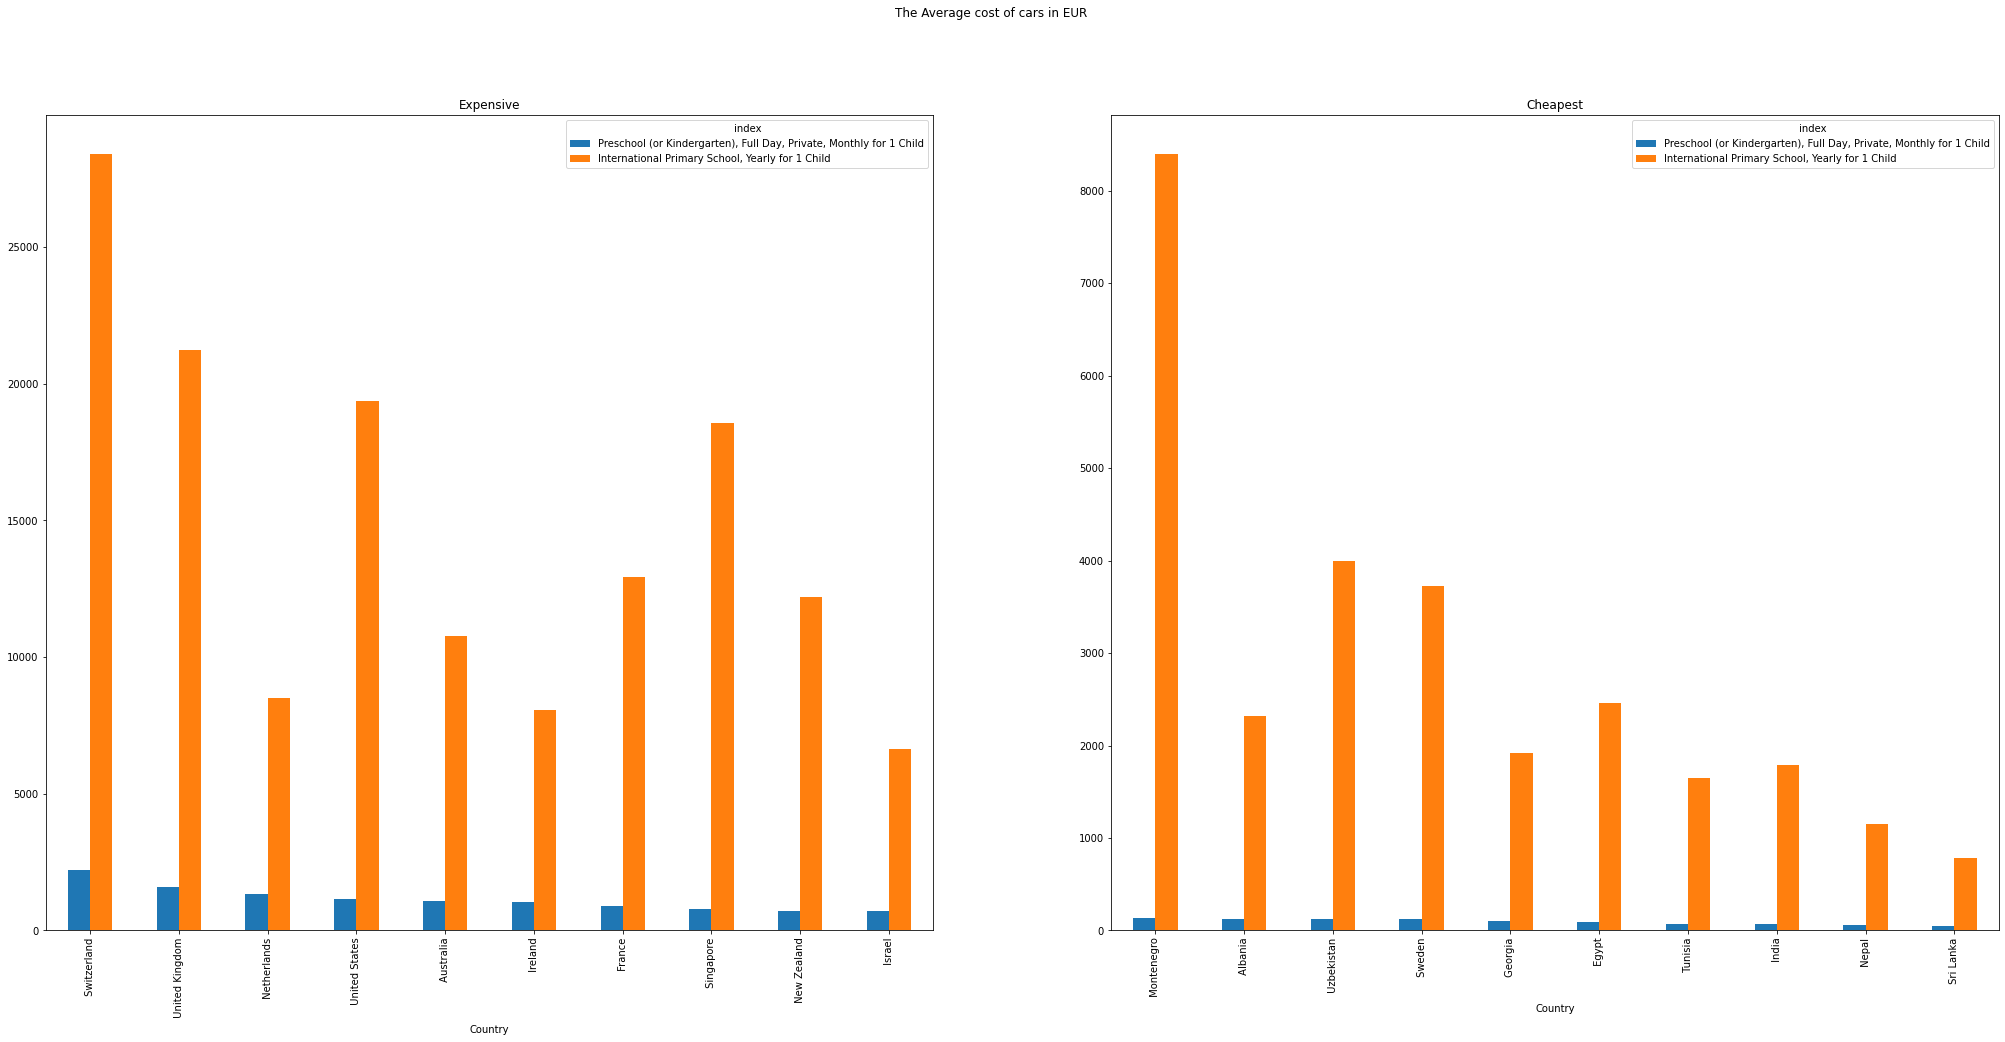

In [43]:
school = country[['Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child','International Primary School, Yearly for 1 Child']]
grouped_sorted = school.sort_values(by=['Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child','International Primary School, Yearly for 1 Child'],ascending=False)
top10 = grouped_sorted.head(10)
low10 = grouped_sorted.tail(10)

fig, axs = plt.subplots(1,2,figsize=(35,15))
fig.suptitle("The Average cost of cars in EUR")
top10.plot(kind='bar',ax=axs[0],title="Expensive")
low10.plot(kind='bar',ax=axs[1],title="Cheapest")
school.to_csv('school.csv')

# Clothing 

1 Pair of Jeans (Levis 501 Or Similar)   

1 Summer Dress in a Chain Store (Zara, H&M, ...)                            
 
1 Pair of Nike Running Shoes (Mid-Range)         
 
 
1 Pair of Men Leather  Business Shoes                                       

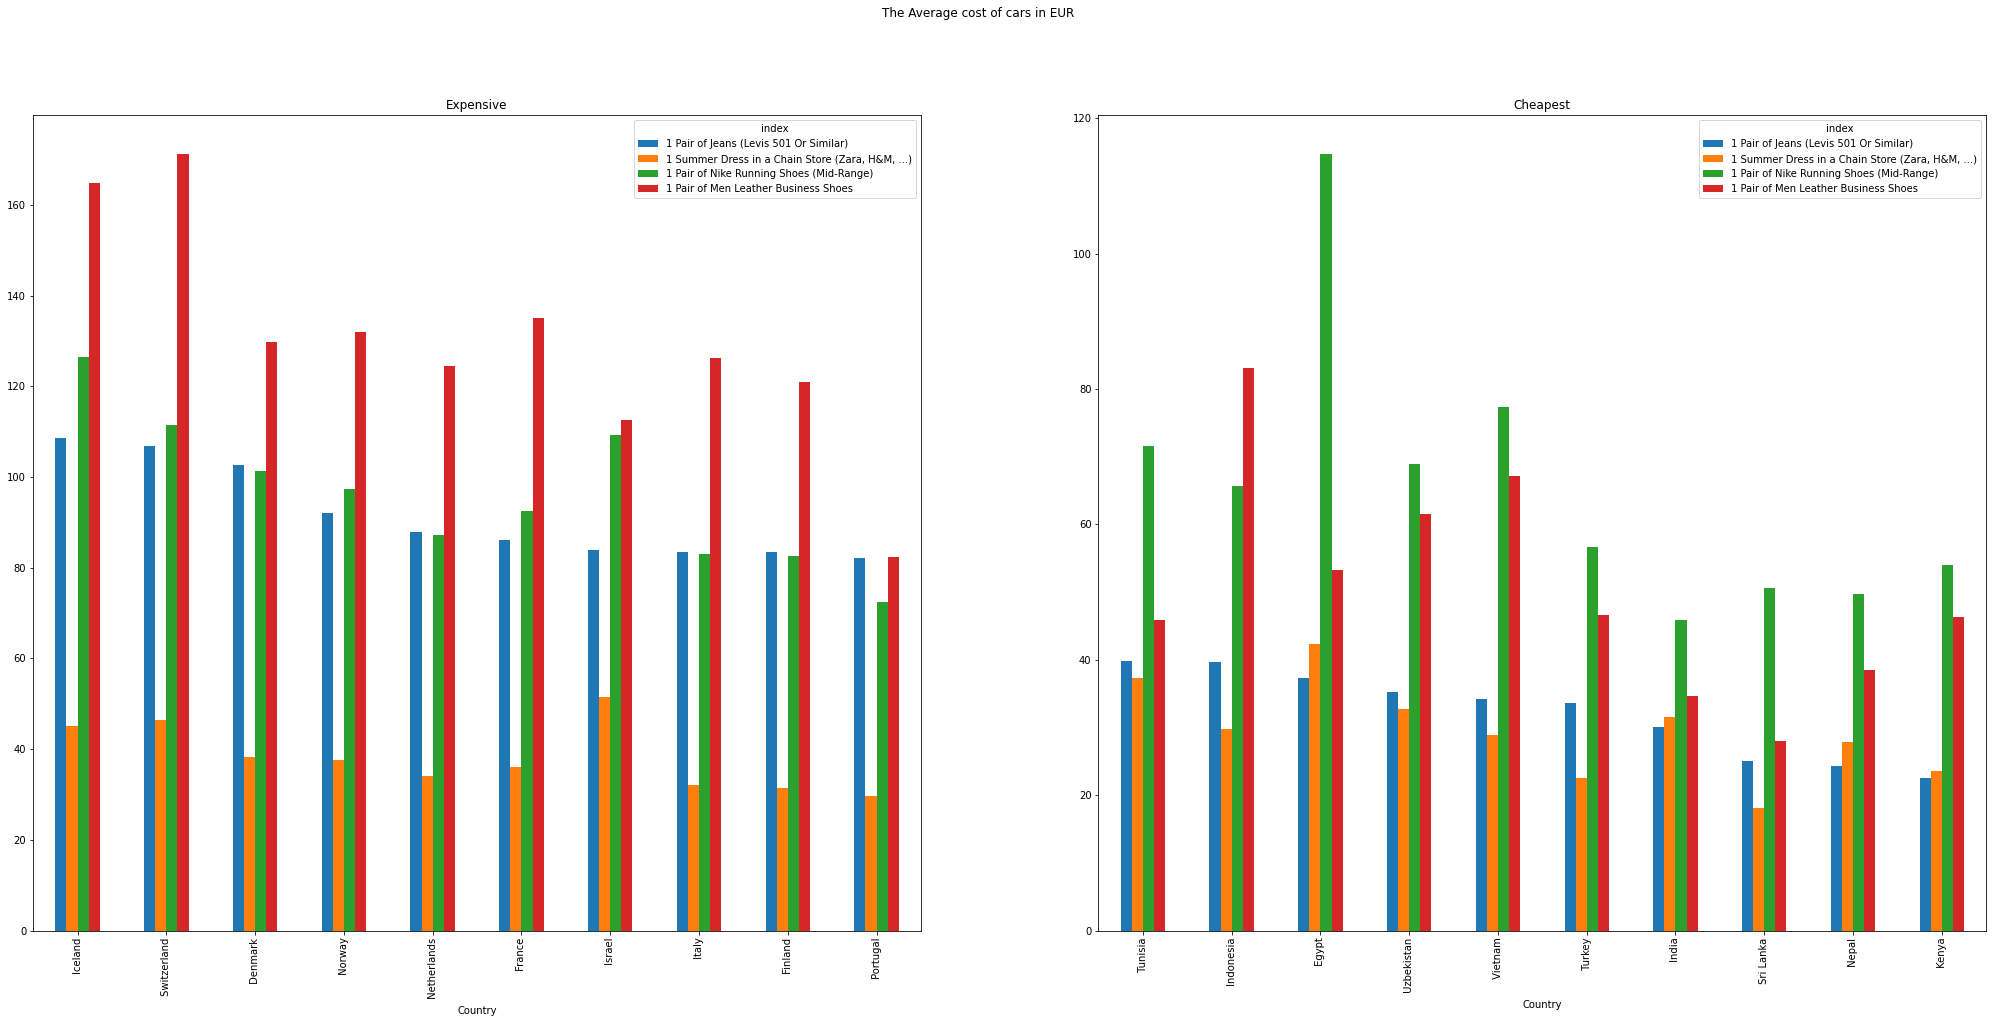

In [44]:
clothes = country[['1 Pair of Jeans (Levis 501 Or Similar)','1 Summer Dress in a Chain Store (Zara, H&M, ...)','1 Pair of Nike Running Shoes (Mid-Range)','1 Pair of Men Leather Business Shoes']]
grouped_sorted = clothes.sort_values(by=['1 Pair of Jeans (Levis 501 Or Similar)','1 Summer Dress in a Chain Store (Zara, H&M, ...)','1 Pair of Nike Running Shoes (Mid-Range)','1 Pair of Men Leather Business Shoes'],ascending=False)
top10 = grouped_sorted.head(10)
low10 = grouped_sorted.tail(10)

fig, axs = plt.subplots(1,2,figsize=(35,15))
fig.suptitle("The Average cost of cars in EUR")
top10.plot(kind='bar',ax=axs[0],title="Expensive")
low10.plot(kind='bar',ax=axs[1],title="Cheapest")
clothes.to_csv('school.csv')

# Entertainment & Miscellaneous 

Domestic Beer (0.5 liter draught)              

Imported Beer (0.33 liter bottle)     

Domestic Beer (0.5 liter bottle)                  

Imported Beer (0.33 liter bottle)                
                        
Cigarettes 20 Pack (Marlboro)    

1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)     

Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)                     

Fitness Club, Monthly Fee for 1 Adult                                       

Tennis Court Rent (1 Hour on Weekend)                                    

Cinema, International Release, 1 Seat                                   

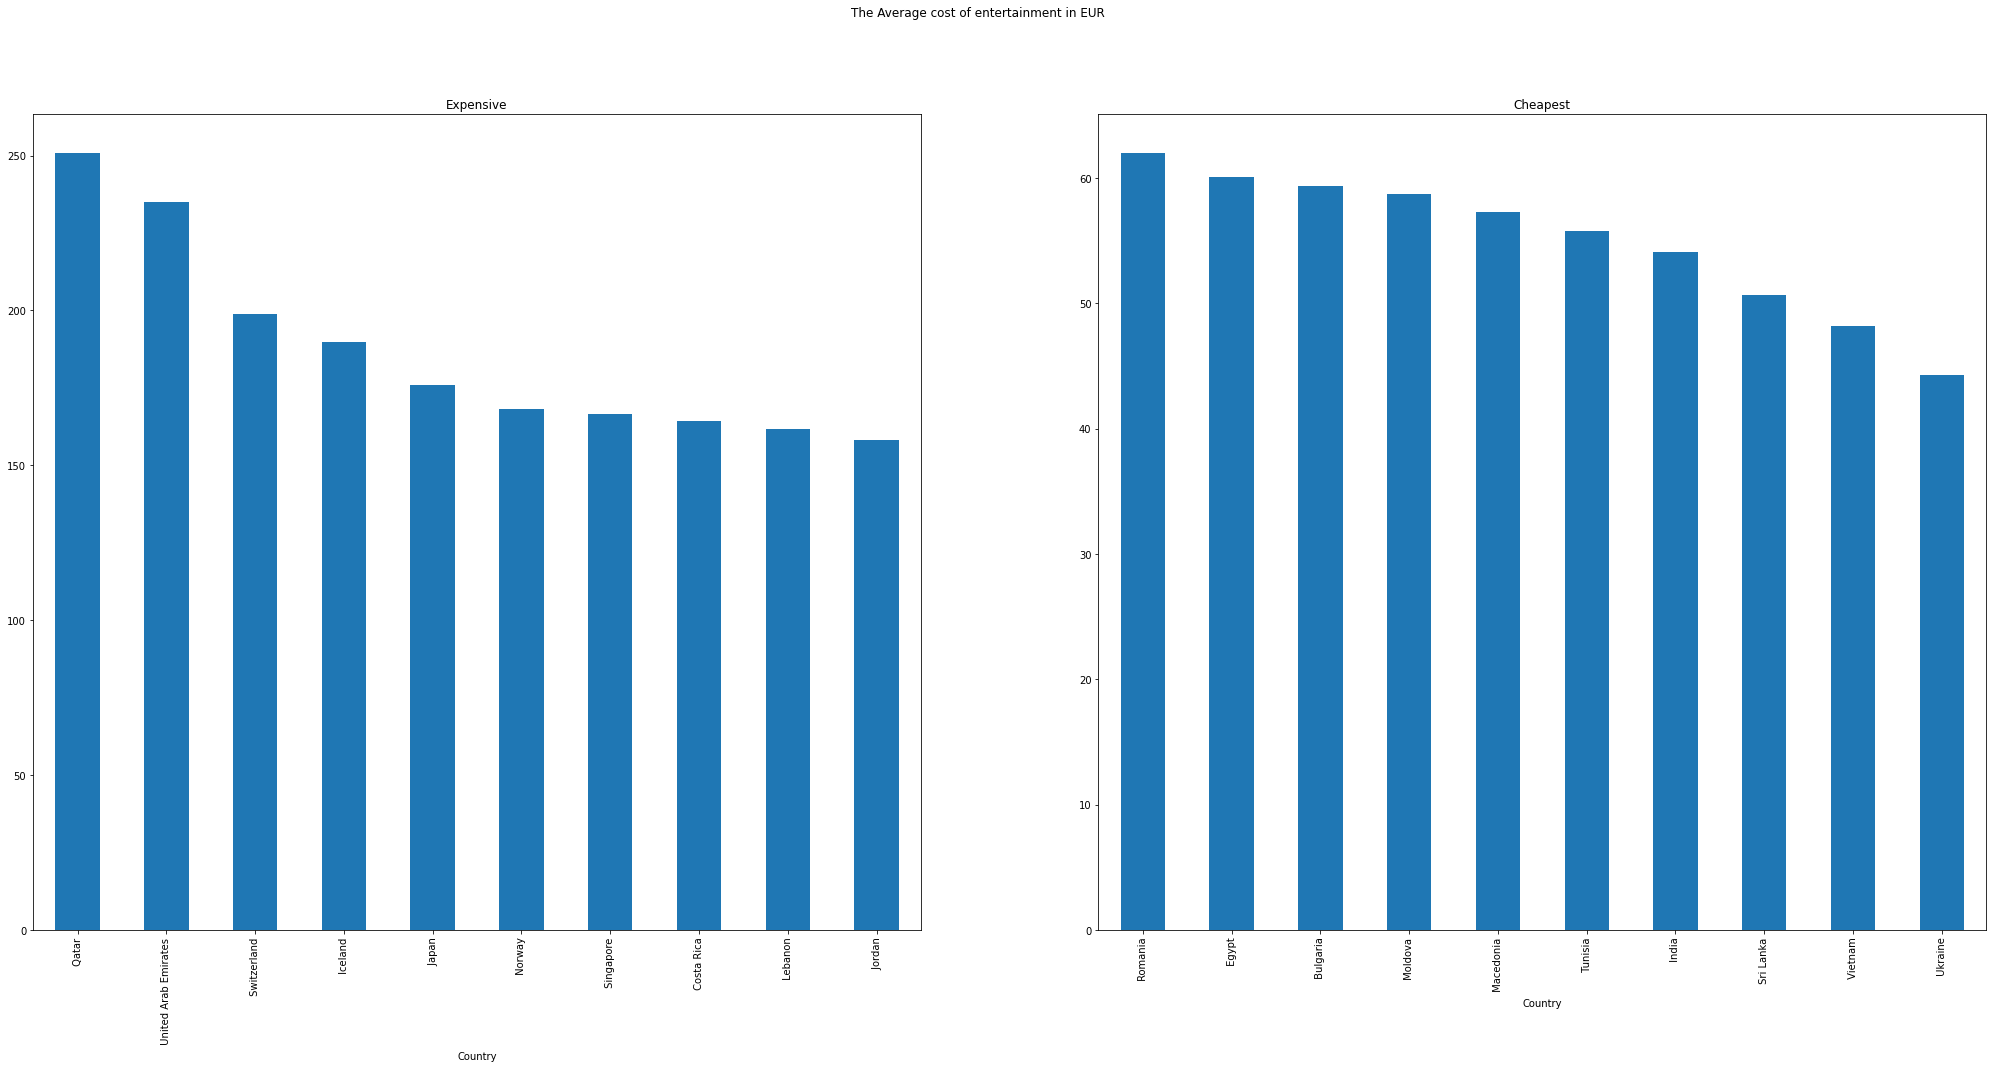

In [45]:
ent = country[['Domestic Beer (0.5 liter draught)','Imported Beer (0.33 liter draught)','Domestic Beer (0.5 liter bottle)','Imported Beer (0.33 liter bottle)','Cigarettes 20 Pack (Marlboro)','1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)','Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)','Fitness Club, Monthly Fee for 1 Adult','Tennis Court Rent (1 Hour on Weekend)','Cinema, International Release, 1 Seat']]
grouped = ent.groupby('Country').sum()
grouped_sorted = grouped.sum(axis=1).sort_values(ascending=False)
top10 = grouped_sorted.head(10)
low10 = grouped_sorted.tail(10)

fig, axs = plt.subplots(1,2,figsize=(35,15))
fig.suptitle("The Average cost of entertainment in EUR")
top10.plot(kind='bar',ax=axs[0],title="Expensive")
low10.plot(kind='bar',ax=axs[1],title="Cheapest")
ent.to_csv('entertainment.csv')

<AxesSubplot: title={'center': 'Cheapest'}, xlabel='Capital'>

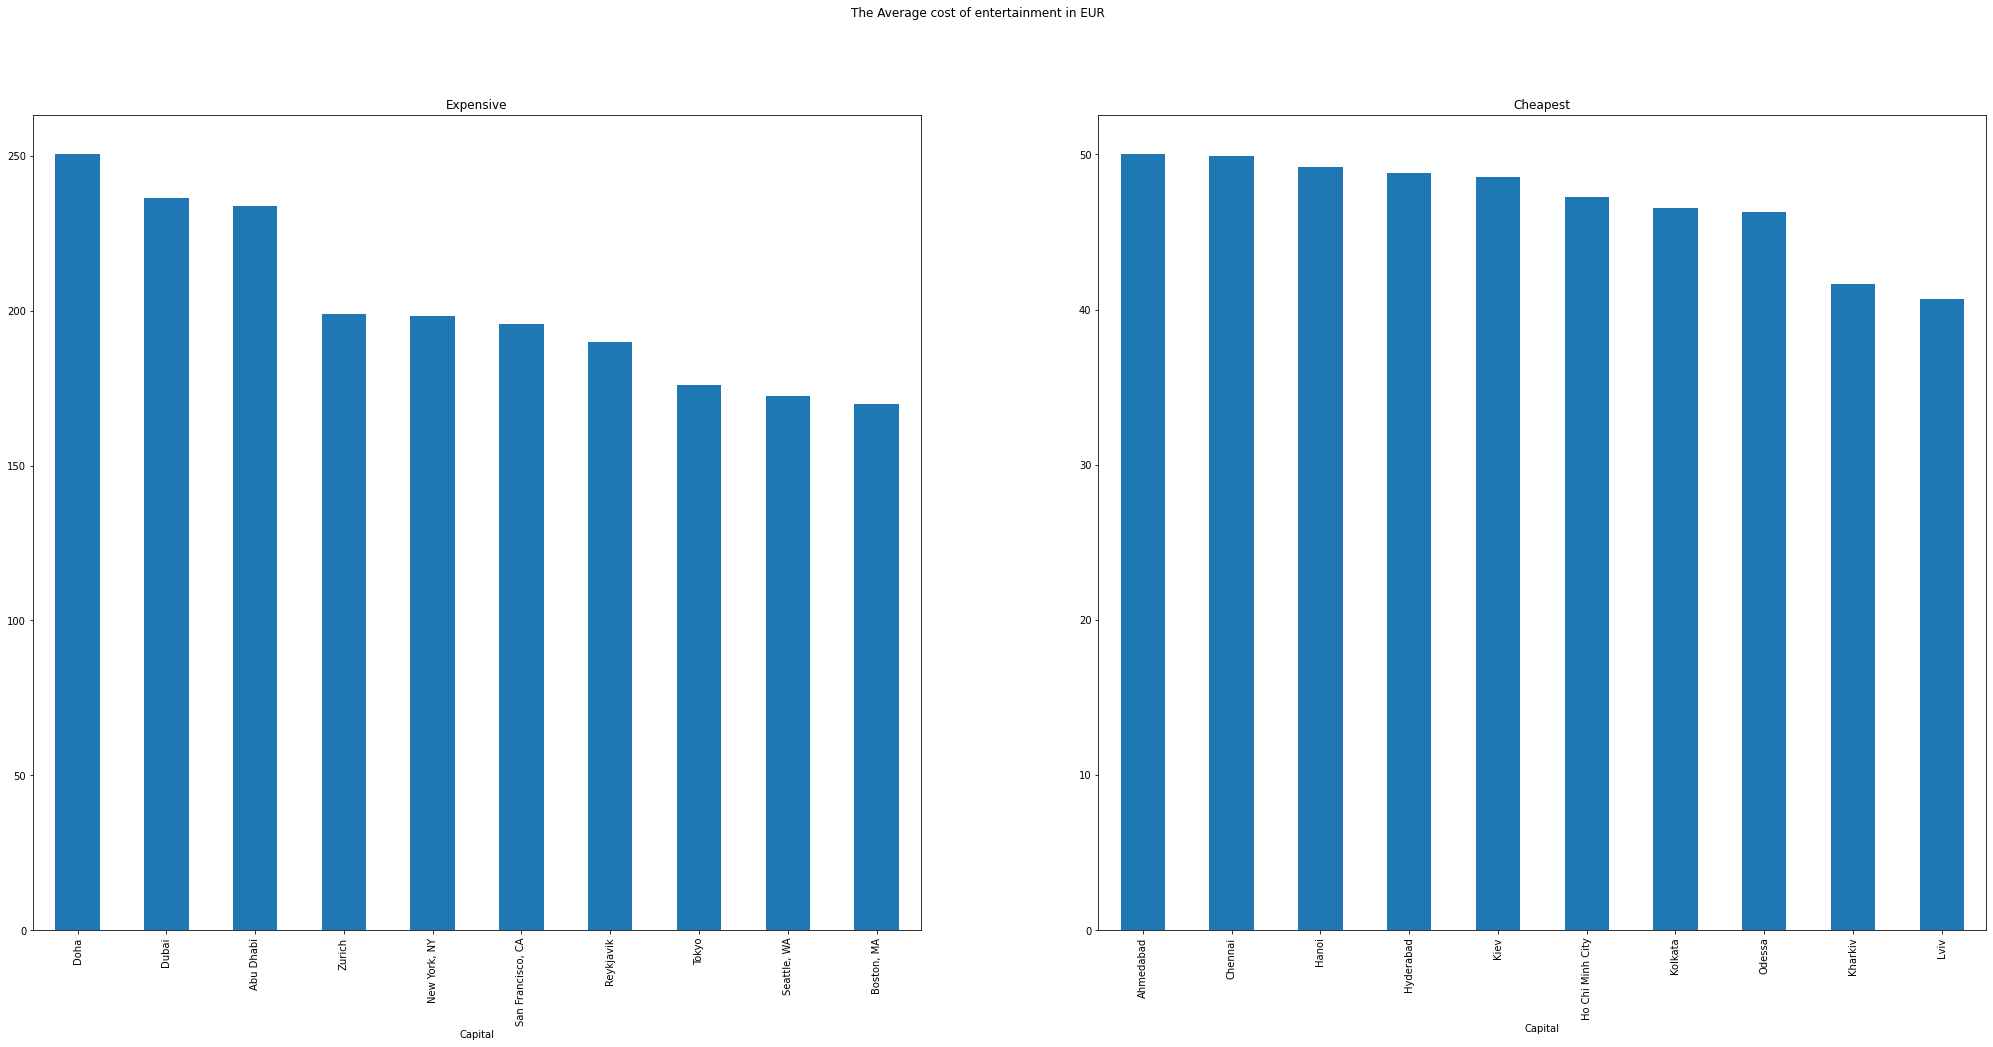

In [46]:
ent = capital[['Domestic Beer (0.5 liter draught)','Imported Beer (0.33 liter draught)','Domestic Beer (0.5 liter bottle)','Imported Beer (0.33 liter bottle)','Cigarettes 20 Pack (Marlboro)','1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)','Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)','Fitness Club, Monthly Fee for 1 Adult','Tennis Court Rent (1 Hour on Weekend)','Cinema, International Release, 1 Seat']]
grouped = ent.groupby('Capital').sum()
grouped_sorted = grouped.sum(axis=1).sort_values(ascending=False)
top10 = grouped_sorted.head(10)
low10 = grouped_sorted.tail(10)

fig, axs = plt.subplots(1,2,figsize=(35,15))
fig.suptitle("The Average cost of entertainment in EUR")
top10.plot(kind='bar',ax=axs[0],title="Expensive")
low10.plot(kind='bar',ax=axs[1],title="Cheapest")

In [47]:
'Average Monthly Net Salary (After Tax)'

'Average Monthly Net Salary (After Tax)'

# Scenario

For someone who's married and likes to watch new releases at cinemas,  has a boy who goes to school, and a girl who's unemployed  and searching for jobs. The hubby and wife works in a store nearby and the boy also in a school nearby.

1. low prices for cinema
2. low prices for school 
3. low taxi prices
4. net salary

In [48]:
scenario = df[['Cinema, International Release, 1 Seat','Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child','International Primary School, Yearly for 1 Child','Taxi Start (Normal Tariff)','Taxi 1km (Normal Tariff)','Average Monthly Net Salary (After Tax)','Country']]
scenario = scenario.groupby('Country').mean()

In [49]:
grouped_sorted = scenario.sort_values(by=['Cinema, International Release, 1 Seat','Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child','International Primary School, Yearly for 1 Child','Taxi Start (Normal Tariff)','Taxi 1km (Normal Tariff)','Average Monthly Net Salary (After Tax)','Country'],ascending=False)
low10 = grouped_sorted.tail(10)
low10

index,"Cinema, International Release, 1 Seat","Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Average Monthly Net Salary (After Tax)
Country,,,,,,
Vietnam,3.595000,138.100000,7629.670000,0.430000,0.485000,350.880000
Uzbekistan,3.590000,125.640000,3996.170000,0.540000,0.180000,205.980000
Kazakhstan,3.580000,153.080000,4428.440000,0.950000,0.350000,374.420000
Sri Lanka,3.480000,45.280000,788.020000,0.300000,0.250000,244.230000
India,3.429091,66.468182,1787.586364,0.633636,0.198182,483.625455
Indonesia,3.280000,140.450000,5755.870000,0.460000,0.330000,414.330000
Turkey,3.250000,234.545000,5298.370000,0.675000,0.500000,428.022500
Tunisia,3.190000,72.310000,1644.930000,0.160000,0.320000,285.790000
Nepal,3.060000,55.920000,1154.070000,1.990000,0.600000,184.170000


 The countries above have low costs in Cinemas, Schools and taxi fares but the average monthly net salary is low

In [50]:
top10 = grouped_sorted.head(10)
top10

index,"Cinema, International Release, 1 Seat","Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Average Monthly Net Salary (After Tax)
Country,,,,,,
Switzerland,16.64,2194.6400,28414.080000,6.470000,4.160000,5714.800000
Japan,14.75,604.0200,17051.340000,3.910000,3.440000,2657.420000
Denmark,14.72,429.5200,7549.800000,6.690000,2.010000,2803.980000
Norway,14.15,319.1900,10981.560000,10.110000,1.420000,2985.880000
United Kingdom,14.00,1605.6500,21240.000000,4.670000,2.970000,2756.930000
Finland,14.00,351.6000,1641.000000,6.000000,1.000000,2382.560000
Sweden,12.58,121.5750,3723.030000,4.555000,1.335000,2329.815000
Ireland,12.00,1041.4900,8078.420000,4.000000,1.350000,2531.160000
United States,11.94,1165.5800,19353.713846,2.728462,1.512308,4120.594615


The countries above have average to high costs in Cinemas, Schools and Taxi fares but the averagemonthly net salary is fairly high

In [53]:
f = df[['Meal, Inexpensive Restaurant','Meal for 2 People, Mid-range Restaurant, Three-course','McMeal at McDonalds (or Equivalent Combo Meal)','Coke/Pepsi (0.33 liter bottle)','Water (0.33 liter bottle) ','Milk (regular), (1 liter)','Loaf of Fresh White Bread (500g)','Eggs (regular) (12)','Local Cheese (1kg)','Water (1.5 liter bottle)','Chicken Breasts (Boneless, Skinless), (1kg)','Apples (1kg)','Oranges (1kg)','Potato (1kg)','Lettuce (1 head)','Cappuccino (regular)','Rice (white), (1kg)','Tomato (1kg)','Banana (1kg)','Onion (1kg)','Beef Round (1kg) (or Equivalent Back Leg Red Meat)','Country','Capital']]
t = df[['One-way Ticket (Local Transport)','Monthly Pass (Regular Price)','Gasoline (1 liter)','Taxi Start (Normal Tariff)','Taxi 1km (Normal Tariff)','Taxi 1hour Waiting (Normal Tariff)','Country','Capital']]
c = df[['Volkswagen Golf','Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car)','Country','Capital']]
h = df[['Apartment (1 bedroom) in City Centre','Apartment (1 bedroom) Outside of Centre','Apartment (3 bedrooms) in City Centre','Apartment (3 bedrooms) Outside of Centre','Country','Capital']]
e = df[['Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment','Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate','Country','Capital']]
s = df[['Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child','International Primary School, Yearly for 1 Child','Country','Capital']]
cl = df[['1 Pair of Jeans (Levis 501 Or Similar)','1 Summer Dress in a Chain Store (Zara, H&M, ...)','1 Pair of Nike Running Shoes (Mid-Range)','1 Pair of Men Leather Business Shoes','Country','Capital']]
en = df[['Domestic Beer (0.5 liter draught)','Imported Beer (0.33 liter draught)','Domestic Beer (0.5 liter bottle)','Imported Beer (0.33 liter bottle)','Cigarettes 20 Pack (Marlboro)','1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)','Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)','Fitness Club, Monthly Fee for 1 Adult','Tennis Court Rent (1 Hour on Weekend)','Cinema, International Release, 1 Seat','Country','Capital']]

In [55]:
f.to_csv('food.csv',index=False)
t.to_csv('transport.csv',index=False)
c.to_csv('car.csv',index=False)
h.to_csv('apartment.csv',index=False)
e.to_csv('expense.csv',index=False)
s.to_csv('school.csv',index=False)
cl.to_csv('clothes.csv',index=False)
en.to_csv('entertainment.csv',index=False)